<a href="https://colab.research.google.com/github/szyrek/sentiment_anal/blob/main/ClassificationIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the target labels
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test = onehot_encoder.transform(y_test.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100
24/24 - 1s - loss: 1.1874 - accuracy: 0.3333 - val_loss: 1.0675 - val_accuracy: 0.3667 - 1s/epoch - 61ms/step
Epoch 2/100
24/24 - 0s - loss: 1.0398 - accuracy: 0.4083 - val_loss: 0.9541 - val_accuracy: 0.4667 - 113ms/epoch - 5ms/step
Epoch 3/100
24/24 - 0s - loss: 0.9407 - accuracy: 0.6583 - val_loss: 0.8673 - val_accuracy: 0.7333 - 160ms/epoch - 7ms/step
Epoch 4/100
24/24 - 0s - loss: 0.8592 - accuracy: 0.7750 - val_loss: 0.7854 - val_accuracy: 0.8000 - 200ms/epoch - 8ms/step
Epoch 5/100
24/24 - 0s - loss: 0.7839 - accuracy: 0.7833 - val_loss: 0.7050 - val_accuracy: 0.8333 - 308ms/epoch - 13ms/step
Epoch 6/100
24/24 - 0s - loss: 0.7114 - accuracy: 0.8000 - val_loss: 0.6345 - val_accuracy: 0.8333 - 368ms/epoch - 15ms/step
Epoch 7/100
24/24 - 0s - loss: 0.6452 - accuracy: 0.8000 - val_loss: 0.5693 - val_accuracy: 0.8333 - 471ms/epoch - 20ms/step
Epoch 8/100
24/24 - 0s - loss: 0.5880 - accuracy: 0.8083 - val_loss: 0.5129 - val_accuracy: 0.8333 - 203ms/epoch - 8ms/step
Epoch 9

1/1 [==============================] - 0s 449ms/step - loss: 0.0446 - accuracy: 1.0000
Test Loss: 0.0446
Test Accuracy: 1.0000


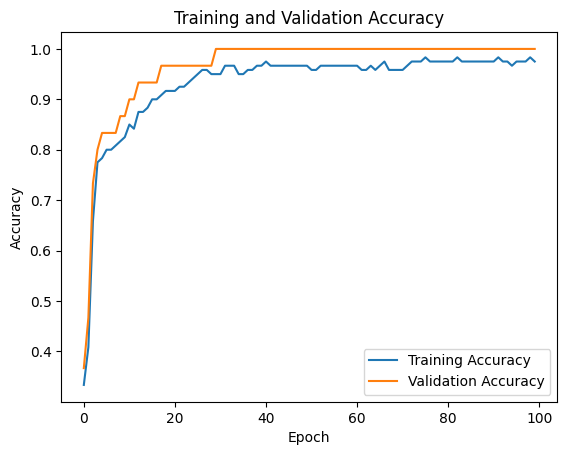

In [3]:
import matplotlib.pyplot as plt

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
# Choose an example data point for visualization and prediction
example_index = 1
example_data = X_test[example_index]
example_label = y_test[example_index]

# Visualize the example data point
print("Example Data:")
print(f"Features: {example_data}")
print(f"True Label: {example_label}")

# Make a single prediction
predicted_probabilities = model.predict(np.expand_dims(example_data, axis=0))
predicted_class = np.argmax(predicted_probabilities)

print("\nSingle Prediction:")
print(f"Predicted Probabilities: {predicted_probabilities}")
print(f"Predicted Class: {predicted_class} (Probability: {predicted_probabilities[0][predicted_class]:.4f})")


Example Data:
Features: [-0.13307079  1.65083742 -1.16139502 -1.17911778]
True Label: [1. 0. 0.]
1/1 [==============================] - 0s 36ms/step

Single Prediction:
Predicted Probabilities: [[9.9939752e-01 5.9281354e-04 9.6476188e-06]]
Predicted Class: 0 (Probability: 0.9994)
